In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mlm_training.model import Model, make_model_param
from mlm_training.pianoroll import Pianoroll

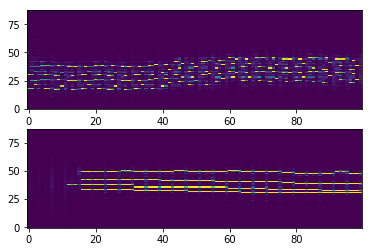

In [106]:
fig, [ax1,ax2] = plt.subplots(2,1)
ax1.imshow(preds_1[2],aspect='auto',origin='lower')
ax2.imshow(preds_1[0],aspect='auto',origin='lower')
plt.show()

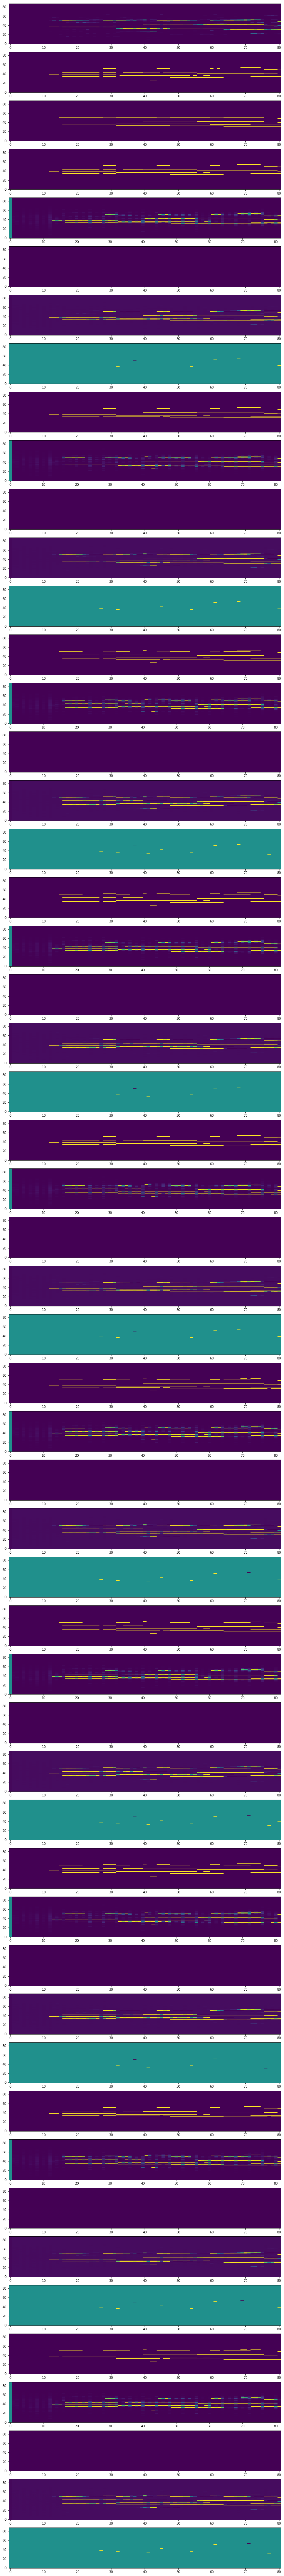

In [32]:
# For viewing beam at a given frame (after running decode.py with --out outputs)

import dataMaps
import pickle
import matplotlib.pyplot as plt

data = dataMaps.DataMaps()
data.make_from_file("data/outputs/test/MAPS_MUS-chpn-p4_ENSTDkAm.mid", "quant", section=[0, 30])

frame = 80
num = 10

frame = min(data.input.shape[1] - 1, frame)

if num > 0:
    with open("results/tmp/data_" + str(frame) + ".pkl", "rb") as file:
        out = pickle.load(file)

acoustic = data.input[:, :frame + 1]
midi = data.target[:, :frame + 1]

fig, ax = plt.subplots(3 + num * 5, 1, figsize=(15,15 + num * 13))
ax[1].imshow((acoustic>0.5).astype(int), aspect='auto', origin='lower')
ax[0].imshow(acoustic, aspect='auto', origin='lower')
ax[2].imshow(midi, aspect='auto', origin='lower')
for i in range(num):
    ax[3 + 5*i].imshow(out[i][0], aspect='auto', origin='lower')
    ax[4 + 5*i].imshow(out[i][1], aspect='auto', origin='lower')
    ax[5 + 5*i].imshow(out[i][2], aspect='auto', origin='lower')
    ax[6 + 5*i].imshow(out[i][3], aspect='auto', origin='lower')
    ax[7 + 5* i].imshow(out[i][0] - (acoustic>0.5).astype(int), aspect='auto', origin='lower')
plt.show()

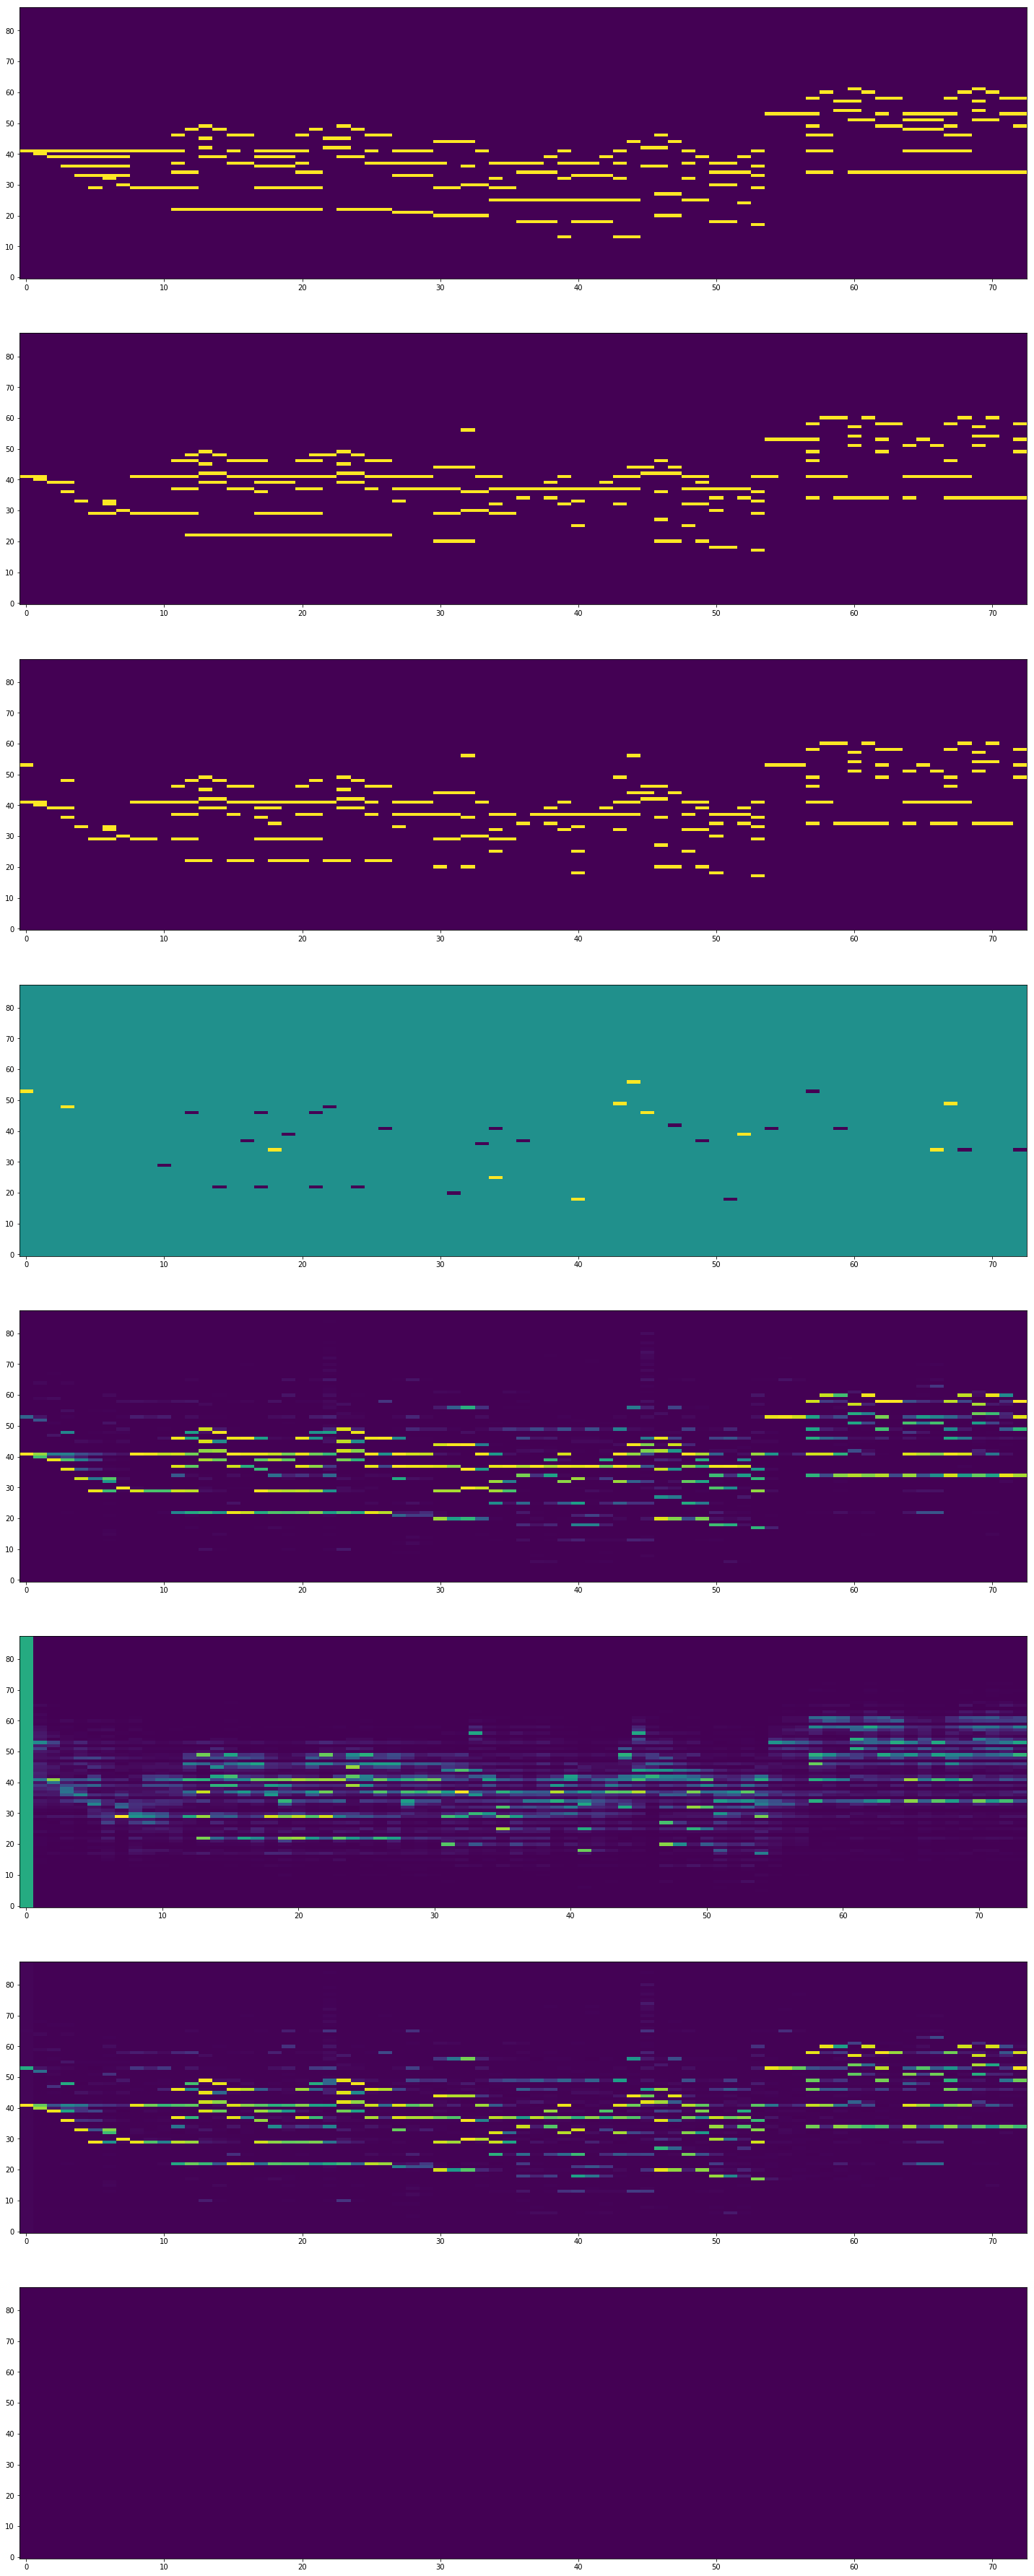

In [23]:
# For viewing results of final output

import dataMaps
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

step = "event"
folder = "results/save/save-" + step + "-wm"
basename = "MAPS_MUS-alb_se2_ENSTDkCl"

pr = np.load(os.path.join(folder, basename + "_pr.npy"))
priors = np.load(os.path.join(folder, basename + "_priors.npy"))
weights = np.load(os.path.join(folder, basename + "_weights.npy"))
combined_priors = np.load(os.path.join(folder, basename + "_combined_priors.npy"))

data = dataMaps.DataMaps()
data.make_from_file("data/outputs/test/" + basename + ".mid", step, section=[0, 30])

acoustic = data.input
midi = data.target

fig, ax = plt.subplots(8, 1, figsize=(25,65))
ax[0].imshow(midi, aspect='auto', origin='lower')
ax[1].imshow((acoustic>0.5).astype(int), aspect='auto', origin='lower')
ax[2].imshow(pr, aspect='auto', origin='lower')
ax[3].imshow(pr - (acoustic>0.5).astype(int), aspect='auto', origin='lower')
ax[4].imshow(acoustic, aspect='auto', origin='lower')
ax[5].imshow(priors, aspect='auto', origin='lower')
ax[6].imshow(combined_priors, aspect='auto', origin='lower')
ax[7].imshow(weights, aspect='auto', origin='lower')
plt.show()

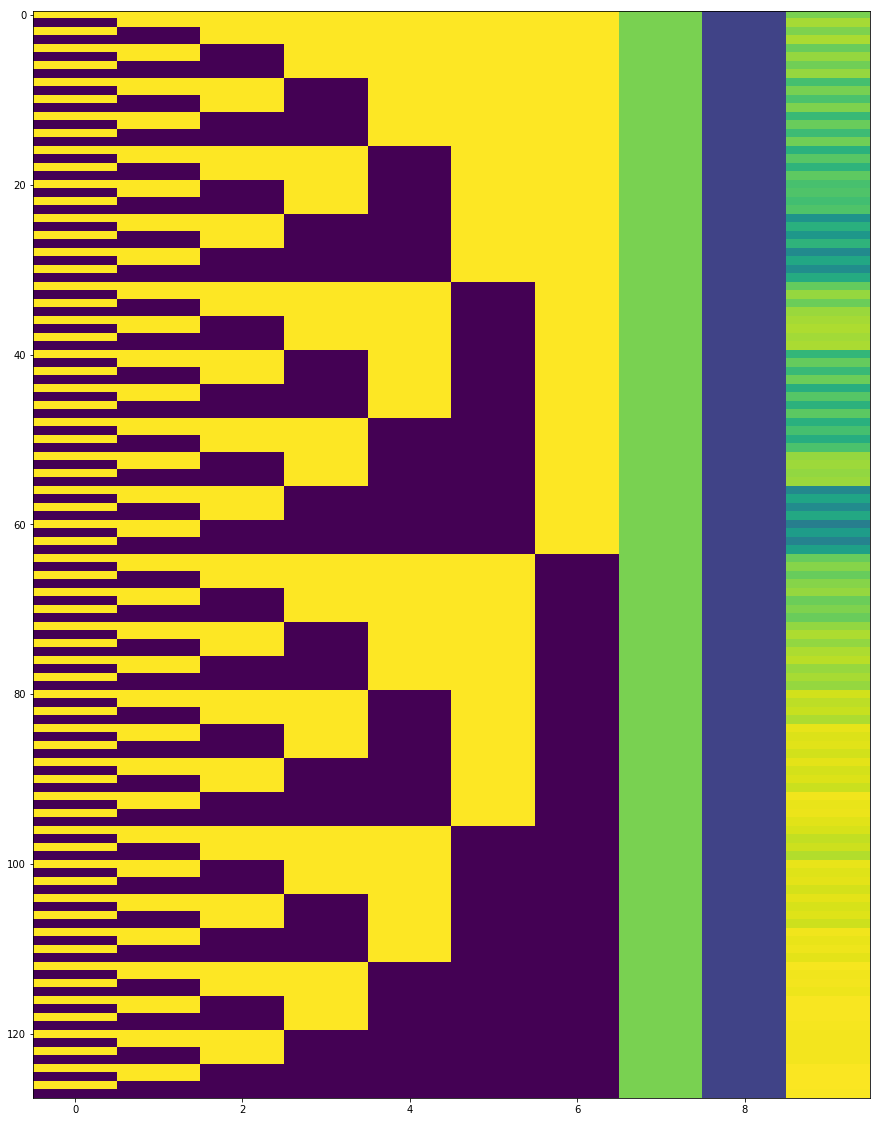

In [129]:
# For investigating weight model

import matplotlib.pyplot as plt
import itertools
import pickle
import sklearn

with open("weight_model.b10_md0.48_h7_l2_prior.quant.best.pkl", "rb") as file:
    model = pickle.load(file)["model"]

ac = 0.8
la = 0.2

lst = np.array([list(i) for i in itertools.product([0, 1], repeat=7)])[::-1,::-1]

data = np.zeros((len(lst), 10))
data[:, :7] = lst
data[:, 7] = ac
data[:, 8] = la

data[:, 9] = model.predict_proba(data[:, :9])[:, 1]

#data = data[np.where(data[:, 6] == 1)[0]]

fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(data, aspect='auto')
plt.show()

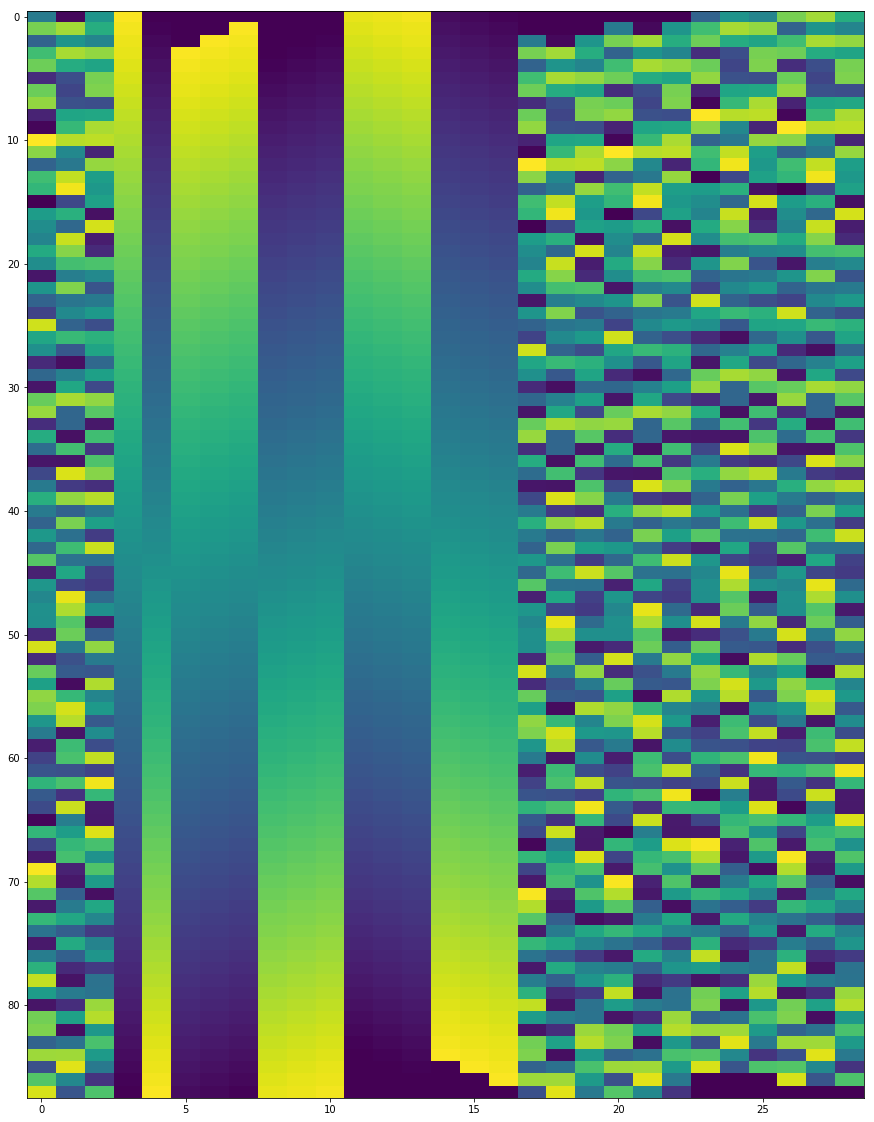

In [17]:
import numpy as np
import importlib
import decode
import matplotlib.pyplot as plt
importlib.reload(decode)

x = np.zeros((88,5))
pr = np.random.rand(88,3)
language = np.arange(88)/88
acoustic = np.arange(88)[::-1]/88
history=3
history_context=2
prior_context=3

x[:,:history] = pr
x[:, -2] = acoustic
x[:, -1] = language

x_pad = decode.pad_x(x, acoustic, language, pr, history, history_context, prior_context)

fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(x_pad, aspect='auto')
plt.show()